Ejercicio obtenido de ``Economic Scenario Generators. A Practical Guide (pags 26-28)`` *(Society of actuaries, 2016)*

Supongamos que para un evento dado, el tamaño de la distribución de pérdidas (gravedad) de nuestra línea de negocio se describe mejor mediante una distribución gamma de **$\alpha$ = 7 y $\lambda$ = 0.0025.**


La distribución gamma ($\Gamma$ como un escalar) con parámetros forma = $\lambda$ y escala = $\alpha$ tiene como función de densidad:
$f(x) = \lambda e^{-\lambda x} \frac{(\lambda x)^{\alpha-1}}{\Gamma(\alpha)}$

El valor esperado (media) y la varianza de una variable aleatoria x de distribución gamma son:
${E(x)} = \alpha \theta = \alpha / \lambda $  y $Var(x) = \alpha \theta^2 = \alpha / \lambda^2$
Se pide:
- Calcular la media y la desviación estándar de la siniestralidad total
- Calcular la siniestralidad esperada en los siguientes percentiles: 90th, 95th, 99th, 99.6th y 99.8th 
- Aplicar 10.000 simulaciones aleatorias con numpy (np.random.gamma) y calcular los anteriores percentiles.

## 1. Calcular la media y la desviación estándar de la siniestralidad total

In [11]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Definimos los parámetros de la distribución Gamma

In [12]:
alpha = 7.
lamdba = 0.0025
theta = 1/lamdba

### Opción 1
Calculamos la media, varianza y desviación típica de forma manual

In [13]:
mean = alpha / lamdba
var = alpha / (lamdba ** 2)
std = np.sqrt(var)
print(mean, std)

2800.0 1058.3005244258363


### Opción 2
Verificamos los mismos valores usando las funciones de scipy.stats

In [14]:
print(st.gamma.mean(a=alpha, scale=1/lamdba), st.gamma.std(a=alpha, scale=1/lamdba))

2800.0 1058.3005244258363


### Opción 3
Creamos el objeto distribución Gamma con los parámetros definidos

In [15]:
siniestralidad = st.gamma(a=alpha, scale=1/lamdba)
print(siniestralidad.mean(), siniestralidad.std())

2800.0 1058.3005244258363


### Opción 4
Obtenemos los momentos media y varianza directamente del método .stats()

In [16]:
m, v = siniestralidad.stats('mv')
print(m,np.sqrt(v))

2800.0 1058.3005244258363


## 2. Calculos de percentiles:
Definimos una lista de percentiles que queremos analizar

In [17]:
percentiles = (0.5, 0.9, 0.95, 0.99, 0.996, 0.998)

Calculamos los percentiles teóricos según la distribución Gamma

In [18]:
for i in percentiles:
	print(f'El percentil {i:.3f} teorico es {st.gamma.ppf(i, a=alpha, scale=1/lamdba):.2f}')

El percentil 0.500 teorico es 2667.85
El percentil 0.900 teorico es 4212.83
El percentil 0.950 teorico es 4736.96
El percentil 0.990 teorico es 5828.25
El percentil 0.996 teorico es 6400.92
El percentil 0.998 teorico es 6818.26


## 3. Aplicar 10.000 simulaciones aleatorias y calcular los anteriores percentiles.
Simulamos 10.000 valores aleatorios de la distribución Gamma

In [19]:
s = np.random.gamma(alpha, theta, size=10000)
for i in percentiles:
	# los percentiles en np.percentile van de 0 a 100
	print(f'El percentil {i:.3f} de la simulacion es {np.percentile(s, i*100):.2f}')

El percentil 0.500 de la simulacion es 2683.98
El percentil 0.900 de la simulacion es 4223.64
El percentil 0.950 de la simulacion es 4777.69
El percentil 0.990 de la simulacion es 5838.56
El percentil 0.996 de la simulacion es 6306.76
El percentil 0.998 de la simulacion es 6749.76


Dibujamos el histograma de los valores simulados junto a la densidad teórica

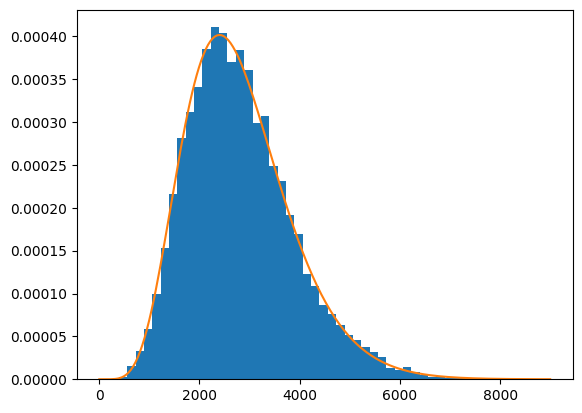

In [20]:
plt.hist(s, 50, density=True)
x = np.linspace (0, 9000, 200) 
y = st.gamma.pdf(x, a=alpha, scale=1/lamdba)
plt.plot(x, y)
plt.show()